

# Chapter 2: Introduction to Optimization

Much of machine learning deals with learning functions by finding the optimal function according to an objective. For example, one may be interested in finding a function $f: R^d -> R$ that minimizes the squared differences to some targets for all the samples: 

$$\sum_{i=1}^n (f(x_i) - y_i)^2$$


To find such a function, you need to have a basic grasp of optimization techniques. In this chapter, we discuss basic optimization tools, for generic smooth objectives. Many of the algorithms in machine learning rely on a simple approach: gradient descent. We first discuss how to minimize objectives using both first and second-order gradient descent. This overview covers only a small part of optimization, but fortunately, many machine learning algorithms are based on these simple optimization approaches. We provide more optimization background later, in Chapter 6, once you have had a chance to use this more basic optimization knowledge in the next couple of chapters.

## 2.1 The basic optimization problem and stationary points

A basic optimization goal is to select a set of parameters w ∈ R^d to minimize a given objective function $c: R^d -> R$

$$
\min_{w \in \mathbb{R}^d} c(w)
$$

For example, to obtain the parameters $w$ for linear regression that minimizes the squared differences, we use 
$$
c(w) = \sum_{i=1}^n (x_i^T w - y_i)^2
$$

where $x_i^T w$ is the dot product between $x_i$ and $w$. 

We use the term *objective* here, rather than *error*, since error has an explicit connotation that the function is inaccurate. Later we will see that objectives will include both error terms—indicating how accurately they recreate data—as well as terms that provide other preferences on the function. Combining these terms with the error produces the final objective we would like to minimize. For example, for linear regression, we will optimize a regularized objective, 

$$
c(w) = \sum_{i=1}^n (x_i^T w - y_i)^2 + \lambda \sum_{j=1}^d w_j^2
$$

where the second term encodes a preference for smaller coefficients $w_j$.

The goal then is to find $w$ that minimizes the objective. The most straightforward, naive solution could be to do a random search: generate random $w$ and check $c(w)$. If any newly generated $w_t$ on iteration $t$ outperforms the previous best solution $w$, in that $c(w_t) < c(w)$, then we can set $w_t$ to be the new optimal solution. We will assume that our objectives are continuous, and so can take advantage of this smoothness to design better search strategies. In particular, for smooth functions, we will be able to use gradient descent, which we describe in the next section.

### Local Minima, Global Minima, and Saddlepoints

![Stationary points](stationary_points.png)

Gradient descent enables us to reach stationary points: points $w$ where the gradient is zero. Consider first the univariate case. The derivative tells us the rate of change of the function surface at a point $w$. When the derivative of the objective is zero at $w ∈ R$, i.e., $d/dw c(w) = 0$, this means that locally the function surface is flat. Such points correspond to local minima, local maxima and saddlepoints, as shown in the figure above. 

For example, assume again that we are doing linear regression, with only one feature and so only one weight $w ∈ R$. The derivative of the objective $c(w) = Σ(x_i w - y_i)^2$ is

$$
\frac{d}{dw} c(w) = \frac{d}{dw} \sum_i (x_i w - y_i)^2 = \sum_i 2(x_i w - y_i) x_i
$$

where the last step follows from the chain rule. Our goal is to find $w$ such that $d/dw c(w) = 0$; once we find such a stationary point, we can then determine if it is a local minimum, local maximum or saddlepoint. 

For the multivariate case, we need to consider gradients instead of derivatives. For $w ∈ R^d$ where $d > 1$, we need to ask: how does the function change locally, depending on how each element of $w$ is changed? To quantify this, we use the gradient which is composed of partial derivatives

$$
\nabla c(w) = 
\begin{bmatrix}
\frac{\partial c}{\partial w_1}(w) \\
\frac{\partial c}{\partial w_2}(w) \\
\vdots \\
\frac{\partial c}{\partial w_d}(w)
\end{bmatrix}
$$

Each partial derivative $∂c/∂w_j(w)$ represents how the function $c$ changes, when only $w_j$ is changed and the other $w_1$, ..., $w_j−1, w_j+1, ..., w_d$ are kept constant. For example, for $c(w = (w_1, w_2)) = (1/2)(x_1 w_1 + x_2 w_2 - y)^2$, the partial derivatives are

$$
\frac{\partial c}{\partial w_1}(w) = (x_1 w_1 + x_2 w_2 - y) x_1 \\

\frac{\partial c}{\partial w_2}(w) = (x_1 w_1 + x_2 w_2 - y) x_2
$$

Usefully, we do not have to consider how the whole vector changes jointly in all the variables. Rather, it is sufficient to find stationary points by finding $w$ where the partial derivatives are zero.

## 2.2 Gradient Descent

The key idea behind gradient descent is to approximate the function with a Taylor series approximation. This approximation facilitates computation of a descent direction locally on the function surface. We begin by considering the univariate setting, with $w ∈ R$. A function $c(w)$ in the neighborhood of point $w_0$, can be approximated using the Taylor series as

$$
c(w) = \sum_{n=0}^{\infty} \frac{c^{(n)}(w_0)}{n!} (w - w_0)^n
$$

where $c^(n)(w_0)$ is the n-th derivative of function $c(w)$ evaluated at point $w_0$. This assumes that $c(w)$ is infinitely differentiable, but in practice we will take such polynomial approximations for a finite $n$. A second-order approximation to this function uses the first three terms of the series as

$$
c(w) \approx \hat{c}(w) = c(w_0) + (w - w_0)c'(w_0) + \frac{1}{2}(w - w_0)^2 c''(w_0)
$$

A stationary point of this $\hat{c}(w)$ can be easily found by finding the first derivative and setting it to zero

$$
\hat{c}'(w) \approx c'(w_0) + (w - w_0)c''(w_0) = 0
$$

Solving this equation for `w` gives us 

$$
w_1 = w_0 - \frac{c'(w_0)}{c''(w_0)}
$$

Locally, this new $w_1$ will be an improvement on $w_0$, and will be a stationary point of this local approximation $\hat{c}$. Moving (far enough) from $w_0$, however, makes this local second-order Taylor series inaccurate. We would need to check the local approximation at this new point $w_1$, to determine if we can further improve locally. Therefore, to find the optimal $w$, we can iteratively apply this procedure

$$
w_{t+1} = w_t - \frac{c'(w_t)}{c''(w_t)}
$$

constantly improving $w_i$ until we reach a point where the derivative is zero, or nearly zero. This method is called the Newton-Raphson method, or second-order gradient descent.

In first-order gradient descent, the approximation is worse, where we no longer use the second derivative. Instead, when taking a first-order approximation, we know that we are ignoring $O((w - w_0)^2)$ terms, and so the local approximation becomes 

$$
c(w) \approx \hat{c}(w) = c(w_0) + (w - w_0)c'(w_0) + \frac{1}{2\eta}(w - w_0)^2
$$

for some constant $\frac{1}{η}$ reflecting the magnitude of the ignored $O((w - w_0)^2)$ terms. The resulting update is then, for step-size $η_t$

$$
w_{t+1} = w_t - \eta_t c'(w_t)
$$

From this, one can see that, given access to the second derivative, a reasonable choice for the stepsize is $η_t = 1/c''(w_t)$.

We can similarly obtain such rules for multivariate variables. For example, gradient descent for $c: R^d -> R$ consists of the update

$$
w_{t+1} = w_t - \eta_t \nabla c(w_t)
$$

where 

$$
\nabla c(w_t) = 
\begin{bmatrix}
\frac{\partial c}{\partial w_1} (w_t) \\
\frac{\partial c}{\partial w_2} (w_t) \\
\vdots \\
\frac{\partial c}{\partial w_d} (w_t)
\end{bmatrix} 
\in \mathbb{R}^d
$$

is the gradient of function $c$ evaluated at $w_t$. We will discuss how to derive this update in the multivariate setting in Chapter 6.

## 2.3 Selecting the Step Size

An important part of (first-order) gradient descent is to select the step size. If the step size is too small, then many iterations are required to reach a stationary point (Figure 2.2(a)); If the step size is too large, then you are likely to oscillate around the minimum (Figure 2.2(b)). What we really want is an adaptive step size (Figure 2.2(c)), that likely starts larger and then slowly reduces over time as a stationary point is approached.

The basic method to obtain adaptive step sizes is to use line search. The idea springs from the following goal: we would like to obtain the optimal step size according to

$$
\min_{\eta \in \mathbb{R}_{+}} c(w_t - \eta \nabla c(w_t))
$$

The solution to this optimization corresponds to the best scalar step size we could select, for the current point $w_t$ with descent direction $-∇c(w_t)$. Solving this optimization would be too expensive; however, we can find approximate solutions quickly. One natural choice is to use a backtracking line search, that tries the largest reasonable step size $η_{max}$, and then reduces it until the objective is decreased. The idea is to search along the line of possible $η ∈ (0, η_{max}]$, with the intuition that a large step is good—as long as it does not overshoot. If it does overshoot, then the step size was too large, and should be reduced. The reduction is typically according to the rule $τη$ for some $τ ∈ [0.5, 0.9]$. For $τ = 0.5$, the step size reduces more quickly—halves on each step of the backtracking line search; for $τ = 0.9$, the search more slowly backtracks from $η_{max}$. As soon as a step size is found that decreases the objective, it is accepted. We then obtain a new $w_t$, again compute the gradient and start the line search once again from $η_{max}$.

One can imagine better strategies for selecting the step size than this simplistic search; we will in fact discuss some of these in Section 6.5. Nonetheless, this basic line search provides some intuition for our goal in adapting the step size.


---
Algorithm 1: Line Search(wt, c, g = ∇c(wt))

---
1. Set optimization parameters:
    $η_{max} = 1.0$
    τ = 0.7
    tolerance ← 10e−4

2. Initialize $η ← η_{max}$
3. Set w ← wt
4. Set obj ← c(w)

5. While the number of backtracking iterations is less than the maximum iterations:
    1. Set w ← wt − ηg
    2. If c(w) < obj - tolerance, then break
    3. Else, decrease stepsize: η ← τη

6. If the maximum number of iterations is reached:
    1. Could not improve solution
    2. Return wt, η = 0

7. Return w, η
---
## 2.4 Optimization Properties

There are several optimization properties to keep in mind when reading this handbook, which we highlight here.

### Maximizing versus Minimizing

We have so far discussed the goal of minimizing an objective. An equivalent alternative is to maximize the negative of this objective.

$$
argmin_{w \in \mathbb{R}^d} c(w) = argmax_{w \in \mathbb{R}^d} -c(w)
$$

where $argmin$ returns $w$ that produces the minimum value of $c(w)$ and $argmax$ returns $w$ that produces the maximum value of $-c(w)$. 

We opt to formulate each of our optimizations as a minimization, and do gradient descent. It would be equally valid, however, to formulate the optimizations as maximizations, and do gradient ascent.

### Convexity

A function $c: R^d -> R$ is said to be convex if for any $w_1, w_2 ∈ R^d$ and $t ∈ [0, 1]$,

$$
c(t w_1 + (1-t) w_2) ≤ t c(w_1) + (1-t) c(w_2)
$$

This definition means that when we draw a line between any two points on the function surface, the function values between these two points all lie below this line. 

Convexity is an important property, because it means that every stationary point is a global minimum. Therefore, regardless of where we start our gradient descent, with appropriately chosen step size and sufficient iterations, we will reach an optimal solution.

A corresponding definition is a concave function, which is precisely the opposite: all points lie above the line. For any convex function $c$, the negative of that function $-c$ is a concave function.

### Uniqueness of the Solution

We often care if there is more than one solution to our optimization problem. In some cases, we care about identifiability, which means we can identify the true solution. If there is more than one solution, one might consider that the problem is not precisely posed. For some problems, it is important or even necessary to have identifiability (e.g., estimating the percentage of people with a disease) whereas for others we simply care about finding a suitable (predictive) function `f` that reasonably accurately predicts the targets, even if it is not the unique such function. 

### Equivalence Under a Constant Shift

Adding or multiplying by a constant $a ≠ 0$ does not change the solution

$$
argmin_{w \in \mathbb{R}^d} c(w) = argmin_{w \in \mathbb{R}^d} a\, c(w) = argmin_{w \in \mathbb{R}^d} c(w) + a
$$

You can see why by taking the gradient of all three objectives and noticing that the gradient is zero under the same conditions

$$
\nabla (a\, c(w)) = 0 \Leftrightarrow a\, \nabla c(w) = 0 \Leftrightarrow \nabla c(w) = 0
$$

and 

$$
\nabla (c(w) + a) = 0 \Leftrightarrow \nabla c(w) = 0
$$

## Visualizing the Gradient Descent Algorithm in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gradient_descent(x_start, learning_rate, num_iterations):
    x = x_start
    x_history = [x]
    for _ in range(num_iterations):
        gradient = compute_gradient(x)
        x = x - learning_rate * gradient
        x_history.append(x)
    return x_history


computing gradient for this function:   $(x) = 2(x + 5)^2$

In [3]:

def compute_gradient(x):
    return 4*x + 20



In [4]:
# Test the gradient descent function
x_start = 5  # initial guess
learning_rate = 0.1  # learning rate
num_iterations = 100  # number of iterations

write map for iterations:

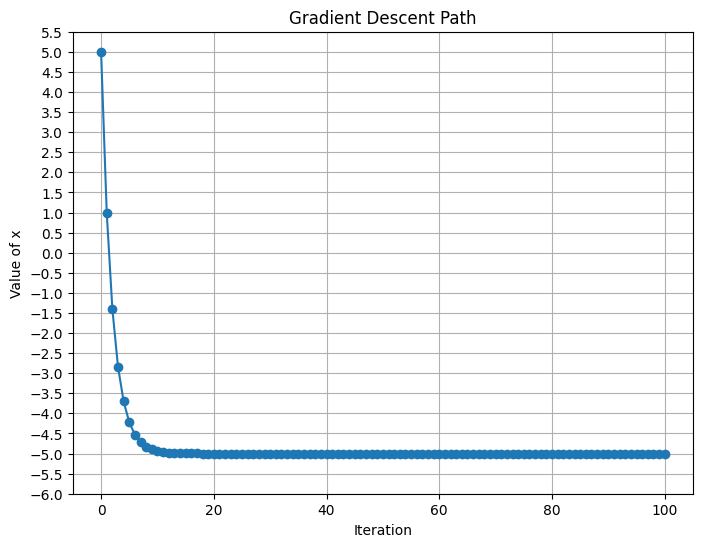

In [5]:
x_history = gradient_descent(x_start, learning_rate, num_iterations)

# Plot the path taken by the gradient descent algorithm
plt.figure(figsize=(8, 6))
plt.plot(x_history, 'o-')
plt.xlabel('Iteration')
plt.ylabel('Value of x')
plt.title('Gradient Descent Path')
plt.grid(True)
plt.yticks(np.arange(-6, 6, 0.5))
plt.show()

In this code:

- The `gradient_descent` function implements the gradient descent algorithm. It starts from an initial guess `x_start` and iteratively updates `x` using the formula `x = x - learning_rate * gradient`, where `learning_rate` is a parameter that determines the step size at each iteration, and `gradient` is the gradient of the function at `x`. The function also keeps track of the history of `x` values.
- The `compute_gradient` function is supposed to compute the gradient of the function at a given point `x`. You need to replace this function with the actual gradient of your function.
- The test at the end of the script calls the `gradient_descent` function with an initial guess of `5`, a learning rate of `0.1`, and `100` iterations. It then plots the path taken by the gradient descent algorithm over the iterations.